# Project 1 
## Investigating medicare dataset

### The data:

Our data is called the home health agencies 2014 and has the data related to home health agencies that provide medicare services from the year 2014. The dataset provides us information about the providers such as their names and geographical locations but it also describes patient-related data like, LUPA and non-LUPA beneficiaries, categorizing patients according to their race and  diseases, etc..

In [6]:
hha_data = pd.read_csv("home_health_agencies_2014_complete.csv")
hha_data.head()


,provider_id,agency_name,street_address,city,state,zip_code,total_episodes_non_lupa,distinct_beneficiaries_non_lupa,average_number_of_total_visits_per_episode_non_lupa,average_number_of_skilled_nursing_visits_per_episode_non_lupa,...,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
0,747203,ALL AMERICAN HEALTHCARE INC,"9894 BISSONNET, SUITE #300",HOUSTON,TX,77036,13,13,13.8,10.2,...,69.0,62.0,62.0,31.0,NaN,62.0,0,54.0,23.0,0
1,747016,JOYSTAR HOME HEALTH SERVICES LLC,2018 RUSTIC OAK LANE,RICHMOND,TX,77469,31,31,8.5,8.5,...,32.0,71.0,52.0,45.0,NaN,39.0,3,NaN,26.0,0
2,747145,APHS HEALTHCARE SERVICES INC,8747 EAST RYLANDER CIR,HOUSTON,TX,77071,68,17,11.7,9.2,...,41.0,47.0,59.0,59.0,NaN,NaN,6,NaN,24.0,6
3,747429,SHEPHERD PERSONAL HOME HEALTH,1806 CRESCENT OAK DR,MISSOURI CITY,TX,77459,203,52,15.3,9.5,...,21.0,65.0,50.0,63.0,67.0,25.0,4,46.0,31.0,8
4,109763,NORTH DADE HOME HEALTH AGENCY INC,633 NE 167TH ST STE 1103,NORTH MIAMI BEACH,FL,33162,137,61,17.9,13.4,...,39.0,NaN,46.0,51.0,NaN,51.0,0,51.0,NaN,8


### Medicare.

Medicare is a health insurance program for people aged 65 years or older. It is run by CMS or Centers for Medicare and Medicaid Services. It also provides services to younger people with some disability status as determined by the Social Security Administration, as well as people with end stage renal disease and amyotrophic lateral sclerosis (ALS or Lou Gehrig's disease).

### What are we looking at? <br>

The data we have is the data about home health agencies from 2014. The variables we have vary from ID details of the providers to the status, description and disease of the patients. We will be exploring these in pieces in order to be able to ascertain meaningful information. 

#### Questions explored:  
 1- Geographic distribution of agencies. <br>
 2- patients by race. <br>
 3- patients by disease. <br> 
 4- regression analysis between total discharges and medicare payments received. <br>

## Demographic Distribution
First, we look at the locations of the various home health agencies and how they are spread across the country and then we will map it to get a clear picture. Since the uszipcode library doesn't provide latitudes and longitudes for all zipcodes given in our dataset we will have to drop the agencies with null values in either latitude or longitude.<br>
<br>
Due to the discrepancy in our data our map shows the geographical spread for only about half the country. From the data that we do have that home health agencies are quite uniformly distributed except in a few places where there a lot of agencies very near to each other. This can be explained by the population that lives there. If the area is heavily populated by people over the age of 65 there are likely to be more agencies in and around those areas. Also, some places are preferred by people to settle down post retirement, Santa Barbara is one such place, and the map shows a bright orange in that region on the pacific coast. Such places also tend to have more senior housings, thus explaining the presence of agencies in large numbers. <br>
<br>
<br>
The agencies that do not have a latitudinal and longitudinal location have been saved in a different dataset and the barchart shows the frequency of agencies in each state that do no have a location on our map by state. Texas has the highest number of agencies in total and also the highest number of agencies with and without a location. For the states that we do have our locations for it is safe to say that agencies are fairly uniformly distributed, except for areas that have a higher senior population and thus, a higher number of agencies; and people have access to medicare and medicaid.

In [16]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)


fig

Figure(layout=FigureLayout(height='420px'))

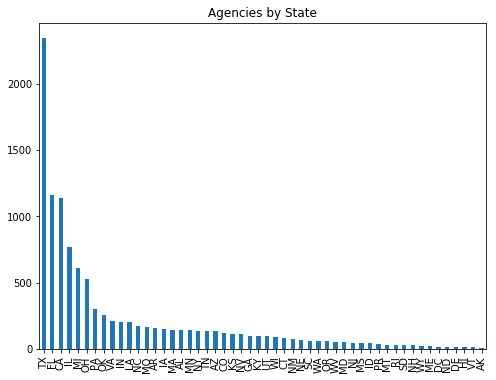

In [38]:
hha_data['state'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(8,6), title ='Agencies by State')
#plt.show()

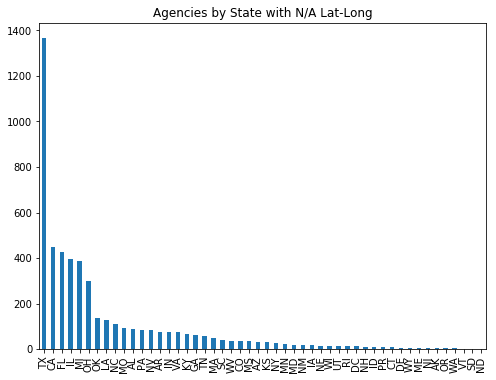

In [24]:
#States with null lat and long
hha_data_new['state'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(8,6), title ='Agencies by State with N/A Lat-Long')

In [39]:
hha_data.describe()

,provider_id,zip_code,total_episodes_non_lupa,distinct_beneficiaries_non_lupa,average_number_of_total_visits_per_episode_non_lupa,average_number_of_skilled_nursing_visits_per_episode_non_lupa,average_number_of_pt_visits_per_episode_non_lupa,average_number_of_ot_visits_per_episode_non_lupa,average_number_of_st_visits_per_episode_non_lupa,average_number_of_home_health_aide_visits_per_episode_non_lupa,...,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke,latitude,longitude
count,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,10882.000000,...,10591.000000,9577.000000,293.000000,10119.000000,10882.000000,8486.000000,10874.000000,10882.000000,4946.000000,4946.000000
mean,317482.244257,58210.849936,552.152086,320.582797,18.647206,9.589781,5.082558,1.039110,0.173626,2.705229,...,48.961099,61.141485,70.194539,55.076984,15.233413,57.854938,10.320397,11.737273,37.096499,-91.887441
std,224675.426656,24928.073066,999.134762,641.572959,6.868199,4.944448,2.907338,1.121121,0.277372,3.726479,...,11.185060,9.149307,5.093614,10.211797,7.083412,9.608852,7.140660,4.844953,5.461251,14.135819
min,17008.000000,601.000000,11.000000,11.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,13.000000,50.000000,7.000000,0.000000,8.000000,0.000000,0.000000,18.000000,-169.000000
25%,109681.250000,35416.250000,125.000000,62.000000,14.800000,7.300000,3.100000,0.200000,0.000000,0.600000,...,41.000000,56.000000,68.000000,48.000000,11.000000,52.000000,6.000000,9.000000,33.352500,-97.365000
50%,247646.000000,60642.000000,282.000000,144.000000,17.300000,8.700000,4.800000,0.700000,0.100000,1.500000,...,48.000000,63.000000,72.000000,56.000000,15.000000,58.000000,9.000000,12.000000,37.895000,-89.065000
75%,458192.500000,77478.000000,599.000000,332.000000,20.400000,10.500000,6.600000,1.600000,0.200000,3.400000,...,57.000000,68.000000,74.000000,63.000000,19.000000,65.000000,12.000000,14.000000,41.400000,-81.742500
max,747935.000000,99901.000000,49987.000000,33696.000000,96.200000,92.200000,25.300000,11.900000,4.200000,77.400000,...,75.000000,75.000000,75.000000,75.000000,73.000000,75.000000,72.000000,53.000000,64.600000,-65.400000


## Patients by race
<br>
Our data shows that the patients are also categorised based on their race, there are 5 races that have been identified and the remaining have been clubbed into a sixth called 'other unknown beneficiaries'. The 5 beneficiaries are white, black, hispanic, pacific islanders and native american or alaskan native beneficiaries. <br>
<br>
The following pie chart shows our distribution of patients by race across the agencies. After dropping off the duplicates we observe that the proportion of white beneficiaries is slightly higher than others. This makes sense because white people also make the majority population of the country and are 2,539,932 in number in our data, followed by black and hispanic beneficiaries at over 400,000 and 250,000, respectively. Native American or Alaskan Native patients count the least at just 9423. <br>
<br>
The exploration of patient distribution by race is an important aspect even though its seemingly simple, i.e. it can help us understand the correlation between race and certain diseases. It can help us find out if certain disease occur mostly or always in a particular group of people and if so, why?

In [45]:
data_by_race = hha_data[["provider_id","white_beneficiaries","black_beneficiaries","asian_pacific_islander_beneficiaries",
                         "hispanic_beneficiaries","american_indian_or_alaska_native_beneficiaries",
                         "other_unknown_beneficiaries"]].set_index("provider_id")
data_by_race.head()

,white_beneficiaries,black_beneficiaries,asian_pacific_islander_beneficiaries,hispanic_beneficiaries,american_indian_or_alaska_native_beneficiaries,other_unknown_beneficiaries
provider_id,,,,,,
747203,NaN,NaN,0.0,NaN,0.0,0.0
747016,NaN,28.0,0.0,NaN,0.0,0.0
747145,NaN,14.0,0.0,NaN,0.0,0.0
747429,11.0,NaN,NaN,29.0,0.0,NaN
109763,18.0,39.0,0.0,NaN,NaN,0.0


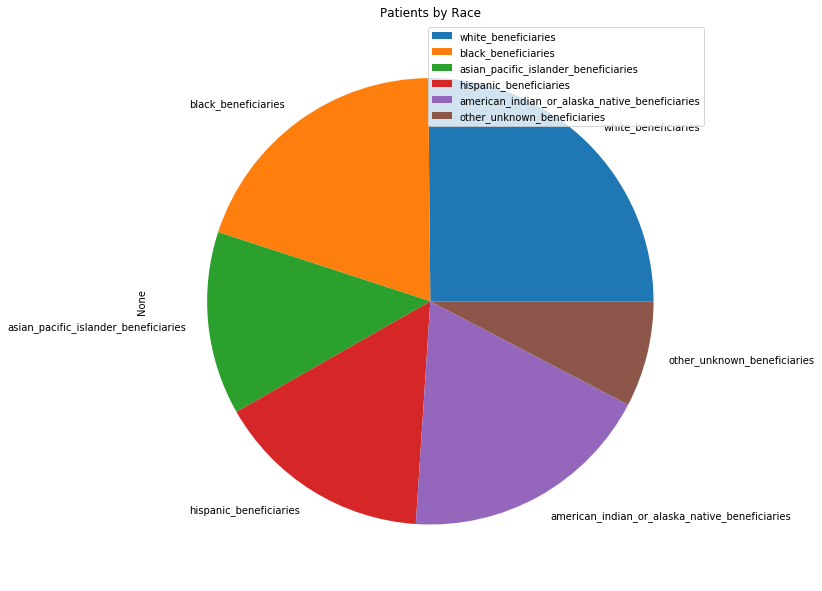

In [66]:
data_by_race.count().plot(kind = 'pie', figsize = (10,15),title = "Patients by Race" , legend = True)

In [67]:
data_by_race.describe()

,white_beneficiaries,black_beneficiaries,asian_pacific_islander_beneficiaries,hispanic_beneficiaries,american_indian_or_alaska_native_beneficiaries,other_unknown_beneficiaries
count,8220.000000,6484.000000,4335.000000,5137.000000,6005.000000,2506.000000
mean,308.994161,67.118754,12.892272,51.949971,1.569192,4.438547
std,562.602807,142.668887,51.924297,105.381289,11.750250,20.195581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,14.000000,0.000000,11.000000,0.000000,0.000000
50%,134.000000,31.000000,0.000000,24.000000,0.000000,0.000000
75%,346.250000,71.000000,13.000000,60.000000,0.000000,0.000000
max,19612.000000,6156.000000,1922.000000,5114.000000,399.000000,861.000000


## Patients by disease 
<br>
The ailments that the patients were diagnosed with are also divided into 16 categories which has been stored by agency in our dataset. <br>
<br>
The spread of patients by disease can be better understood by looking at the following pie chart and statistical summary table. The portions in the pie chart look exactly similar except for hypertension which appears to just be a sliver in the pie. This is because all other diseases have had over 9000 occurrences across all agencies except for hypertension with only 293 occurences.Average of diseases diagnosed per provider was around 470. <br>
<br>
Few of the highest appearing diseases on average are Alzheimers (32.7), Congestive Heart Failure (42.6), Chronic Kidney Disease (42.4), Chronic Obstructive Pulmonary Disease (31.9), Diabetes (48.9), Hyperlipidemia (61.1), Hypertension (70.1), Ischemic Heart Disease (55.07) and Rheumatoid/Osteo Arthritis (57.8). <br>
<br>
The column-wise histograms show how many times the number of disease has occurred in the data. x-axis is the number of occurrences of a particular disease per agency and y axis is how many times it occurred. Diseases related to kidneys and heart seem to occur more often across the data.  <br>
<br>
The correlation table and heatmap show the relationship between two diseases, if any. There is no strong positive relationship between two disease however, a moderate positive relationship can be seen in some instances, for example, Ischemic Heart Disease has a moderate positive correlation with Diabetes, Chronic Obstructive Pulmonary Disease, Hyperlidimia and Rheumatoid/Osteo Arthritis with r values at approximately 0.34, 0.36, 0.41 and 0.33 respectively. r values closer to 1 show a strong positive correlation and then it declines further to moderate and weak correlation. Negative values mean that there is no correlation between the two values as in the case of Schizophrenia and Osteoporosis. <br>
<br>

In [190]:
data_by_disease = df_disease.rename(columns = {"percent_of_beneficiaries_with_atrial_fibrillation":"Atrial fibrillation",
                                              "percent_of_beneficiaries_with_alzheimers":"Alzheimers",
                                              "percent_of_beneficiaries_with_asthma" : "Asthma",
                                              "percent_of_beneficiaries_with_cancer": "Cancer",
                                              "percent_of_beneficiaries_with_chf" : "Congestive Heart Failure",
                                              "percent_of_beneficiaries_with_chronic_kidney_disease":"Chronic Kidney Disease",
                                              "percent_of_beneficiaries_with_copd":"Chronic Obs. Pulmonary Disease",
                                              "percent_of_beneficiaries_with_depression":"Depression",
                                              "percent_of_beneficiaries_with_diabetes":"Diabetes",
                                              "percent_of_beneficiaries_with_hyperlipidemia":"Hyperlipidemia",
                                              "percent_of_beneficiaries_with_hypertension": "Hypertension",
                                              "percent_of_beneficiaries_with_ihd": "Ischemic Heart Disease",
                                              "percent_of_beneficiaries_with_osteoporosis": "Osteoporosis",
                                              "percent_of_beneficiaries_with_ra_oa":"Rheumatoid/Osteo Arthritis",
                                              "percent_of_beneficiaries_with_schizophrenia":"Schizophrenia",
                                              "percent_of_beneficiaries_with_stroke":"Stroke"})
data_by_disease.head()

,state,Atrial fibrillation,Alzheimers,Asthma,Cancer,Congestive Heart Failure,Chronic Kidney Disease,Chronic Obs. Pulmonary Disease,Depression,Diabetes,Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Rheumatoid/Osteo Arthritis,Schizophrenia,Stroke
provider_id,,,,,,,,,,,,,,,,,
747203,TX,8,0.0,31.0,0,31.0,15.0,69.0,62.0,62.0,31.0,NaN,62.0,0,54.0,23.0,0
747016,TX,3,13.0,23.0,3,19.0,19.0,32.0,71.0,52.0,45.0,NaN,39.0,3,NaN,26.0,0
747145,TX,6,6.0,12.0,0,41.0,35.0,41.0,47.0,59.0,59.0,NaN,NaN,6,NaN,24.0,6
747429,TX,2,21.0,15.0,6,27.0,25.0,21.0,65.0,50.0,63.0,67.0,25.0,4,46.0,31.0,8
109763,FL,3,21.0,18.0,3,13.0,23.0,39.0,NaN,46.0,51.0,NaN,51.0,0,51.0,NaN,8


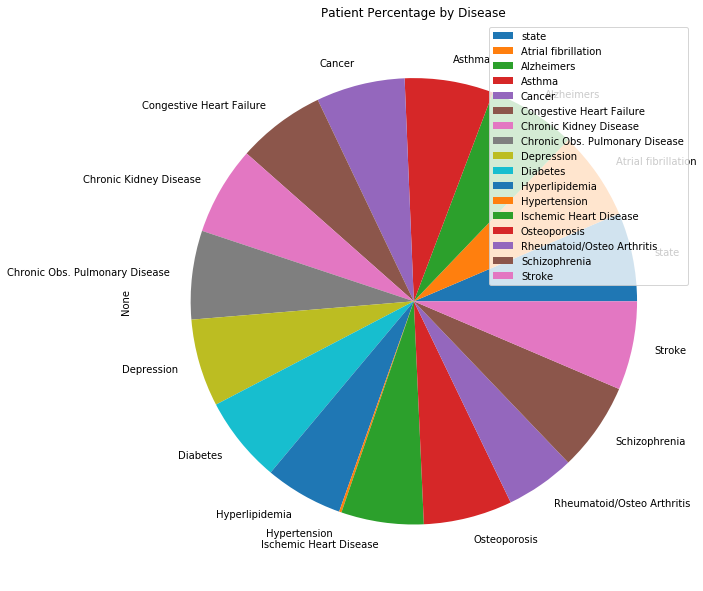

In [203]:
data_by_disease.count().plot(kind = 'pie', figsize = (10,15), title = "Patient Percentage by Disease", legend = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cd215c0>,
      dtype=object)

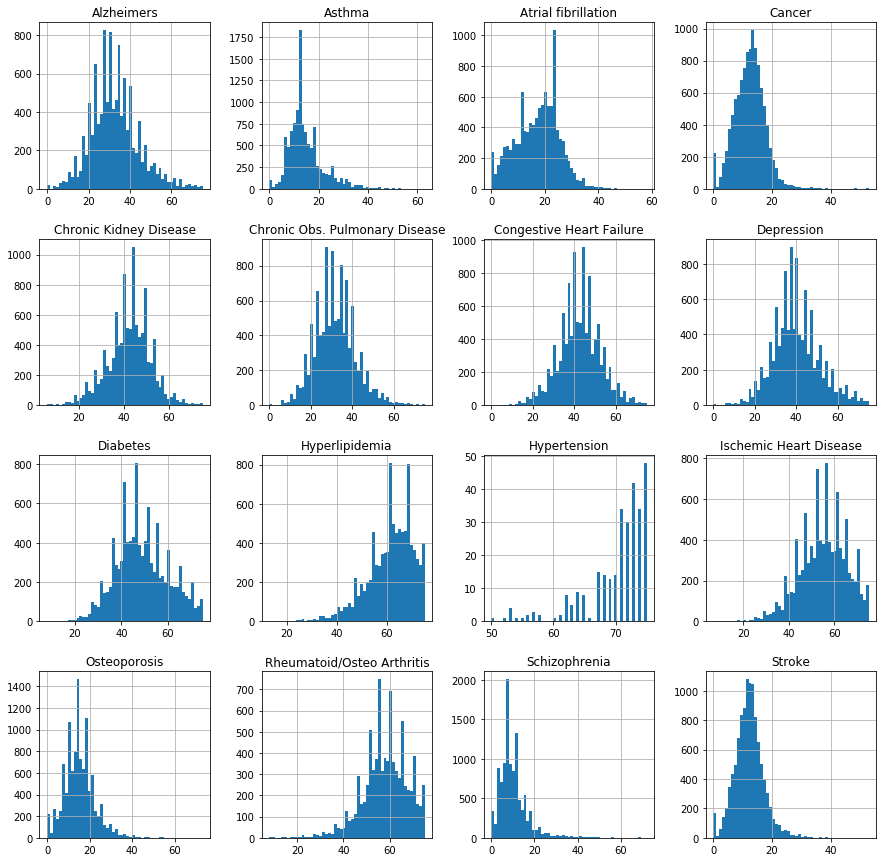

In [207]:
data_by_disease.hist(figsize = (15,15), bins = 53)

x axis is the number itself and y axis is the number of time it occurs. 

In [90]:
corr_disease = var1.corr()
corr_disease

,Atrial fibrillation,Alzheimers,Asthma,Cancer,Congestive Heart Failure,Chronic Kidney Disease,Chronic Obs. Pulmonary Disease,Depression,Diabetes,Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Rheumatoid/Osteo Arthritis,Schizophrenia,Stroke
Atrial fibrillation,1.000000,0.071512,-0.334521,0.500131,0.289106,0.346992,0.044201,-0.063169,-0.459032,0.108969,0.122020,0.071094,0.195829,0.002647,-0.137310,0.255534
Alzheimers,0.071512,1.000000,-0.077305,-0.062576,0.184644,0.127619,0.001768,0.291922,0.063584,0.061924,0.116393,0.150072,0.284607,0.164390,0.248313,0.236302
Asthma,-0.334521,-0.077305,1.000000,-0.225659,0.126844,-0.079032,0.217637,0.141772,0.384045,0.159044,-0.067889,0.172385,-0.126099,0.140239,0.073930,-0.054374
Cancer,0.500131,-0.062576,-0.225659,1.000000,0.103018,0.242405,0.036451,-0.118847,-0.352521,0.079591,-0.011416,0.006762,0.090160,-0.068724,-0.146245,0.167278
Congestive Heart Failure,0.289106,0.184644,0.126844,0.103018,1.000000,0.418889,0.336898,-0.002636,0.180549,0.183270,0.129340,0.404270,-0.014632,0.199058,-0.014379,0.282189
Chronic Kidney Disease,0.346992,0.127619,-0.079032,0.242405,0.418889,1.000000,0.137241,-0.051362,0.050827,0.212407,0.168466,0.142487,0.024497,-0.036478,-0.032111,0.330180
Chronic Obs. Pulmonary Disease,0.044201,0.001768,0.217637,0.036451,0.336898,0.137241,1.000000,0.233590,0.161225,0.138633,0.026845,0.337622,-0.085155,0.164893,0.169448,0.107246
Depression,-0.063169,0.291922,0.141772,-0.118847,-0.002636,-0.051362,0.233590,1.000000,0.058842,0.108666,0.156437,0.119358,0.133930,0.225995,0.391455,-0.034841
Diabetes,-0.459032,0.063584,0.384045,-0.352521,0.180549,0.050827,0.161225,0.058842,1.000000,0.313527,0.085896,0.355174,-0.111688,0.119045,0.043710,0.017909
Hyperlipidemia,0.108969,0.061924,0.159044,0.079591,0.183270,0.212407,0.138633,0.108666,0.313527,1.000000,0.187053,0.408619,0.153830,0.282801,-0.048279,0.188916


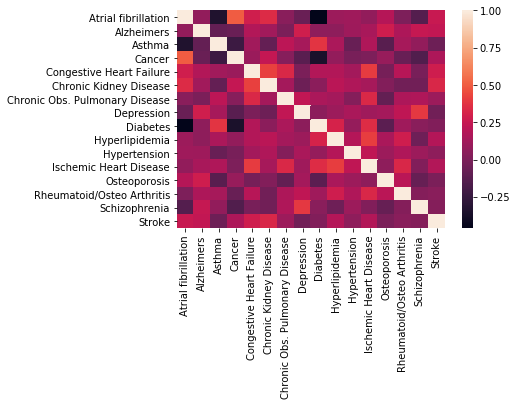

In [130]:
sns.heatmap(corr_disease)

In [92]:
data_by_disease.describe()

,Atrial fibrillation,Alzheimers,Asthma,Cancer,Congestive Heart Failure,Chronic Kidney Disease,Chronic Obs. Pulmonary Disease,Depression,Diabetes,Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Rheumatoid/Osteo Arthritis,Schizophrenia,Stroke
count,10882.000000,10810.000000,10881.000000,10882.000000,10826.000000,10857.000000,10874.000000,10751.000000,10591.000000,9577.000000,293.000000,10119.000000,10882.000000,8486.000000,10874.000000,10882.000000
mean,17.317864,32.738113,14.862880,11.918765,42.626455,42.443677,31.949053,40.150126,48.961099,61.141485,70.194539,55.076984,15.233413,57.854938,10.320397,11.737273
std,8.051675,11.499225,7.327385,5.129839,9.954536,9.495295,9.820694,11.202582,11.185060,9.149307,5.093614,10.211797,7.083412,9.608852,7.140660,4.844953
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,8.000000,13.000000,50.000000,7.000000,0.000000,8.000000,0.000000,0.000000
25%,11.000000,25.000000,10.000000,9.000000,36.000000,37.000000,25.000000,33.000000,41.000000,56.000000,68.000000,48.000000,11.000000,52.000000,6.000000,9.000000
50%,18.000000,32.000000,13.000000,12.000000,43.000000,43.000000,32.000000,39.000000,48.000000,63.000000,72.000000,56.000000,15.000000,58.000000,9.000000,12.000000
75%,23.000000,39.000000,18.000000,15.000000,49.000000,48.000000,38.000000,47.000000,57.000000,68.000000,74.000000,63.000000,19.000000,65.000000,12.000000,14.000000
max,58.000000,75.000000,63.000000,53.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,73.000000,75.000000,72.000000,53.000000


## Inpatient Data
<br>
<br>
Another dataset related to the home health agencies is the inpatient data from 2014 which provides information about agencies that admit patients and treat them in their facilities. <br>
<br>
On doing a regression analysis on the total number of patient discharges and the average medicare payment per agency we find that the slope of the line is negative meaning that there is a negative relationship between both variables. As the number of patients increase, there is a fall in the medicare payments. The scatterplot of the same variables also makes the picture clear. If our statistical question were to determine the relationship between number of discharges and the amount of medicare covered, our p-value obtained is less than our significant value which means that we have enough evidence to say that the relationship is also true for the entire population. This is significant in our analysis because we had to drop the missing location values, so we can treat this data as sample data and our conclusion would hold true for the population data as well. <br>
<br>
<br>
The r value is the correlation coefficient which is also negative, meaning that the relationship between both variables is negative. The slope of our fitted line is -10.56 and standard error is calculated at 0.56. <br>
<br>
<br>
The table summarizing the data on the inpatient charges shows that the mean payments covered by medicare are around 11,218 USD. The average total payments to an agency is around 13,169 USD. The standard deviation shows the spread of how higher or lower the costs can go away from the mean and the standard deviation for average medicare payments id 12,279 USD. <br> 
<br>
<br> 
A bar chart of the volume of service providers per state shows that California has the highest number of inpatient service providers followed by Florida and Texas, whereas Arkansas seems to have the lowest amount of inpatient service providers. <br>




In [96]:
 inpatient_data = pd.read_csv("inpatient_data_2014.csv")
 inpatient_data.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,drg_definition,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,AZ - Mesa,13,220917.15380,32199.692310,31453.846150
1,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ - Mesa,14,68179.21429,7669.642857,6545.071429
2,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,AZ - Mesa,39,55095.15385,11355.974360,9687.384615
3,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,AZ - Mesa,50,39369.98000,7450.920000,6509.480000
4,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,AZ - Mesa,32,33452.12500,5822.562500,4914.562500


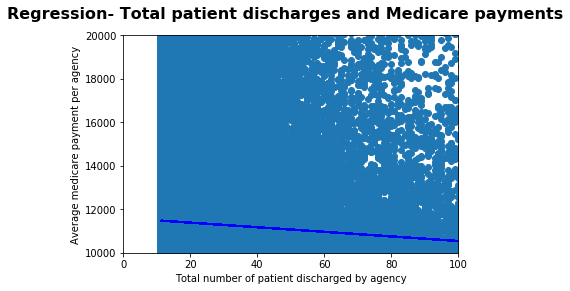

In [103]:
fig, ax = plt.subplots()

fig.suptitle("Regression- Total patient discharges and Medicare payments", fontsize=16, fontweight="bold")

ax.set_xlim(0, 100)
ax.set_ylim(10000, 20000)

ax.set_xlabel("Total number of patient discharged by agency")
ax.set_ylabel("Average medicare payment per agency")

ax.plot(inpatient_data["total_discharges"], inpatient_data["average_medicare_payments"], linewidth=0, marker='o')
ax.plot(inpatient_data["total_discharges"], fit, 'b--')

plt.show()



In [105]:
inpatient_charges_data.describe()

,average_covered_charges,average_total_payments,average_medicare_payments
count,2.026560e+05,202656.000000,202656.000000
mean,5.258934e+04,13168.560144,11218.465217
std,6.244522e+04,13772.839671,12279.103622
min,1.367652e+03,2320.482759,1329.909091
25%,2.094930e+04,6258.925806,5011.979167
50%,3.463380e+04,9180.169753,7714.654762
75%,6.076193e+04,14631.466690,12472.680285
max,2.238699e+06,434396.000000,403453.652200


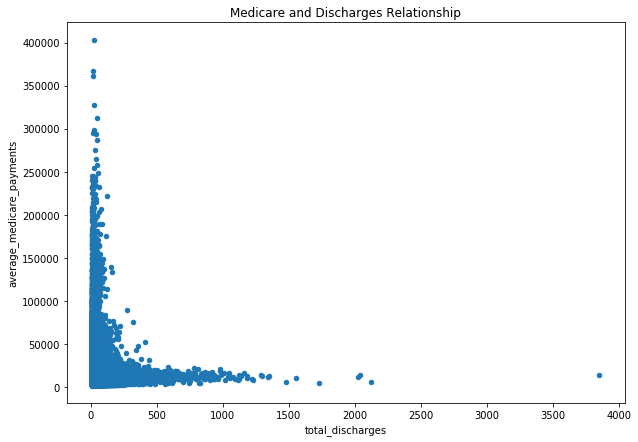

In [110]:
inpatient_data.plot.scatter(x='total_discharges', y = 'average_medicare_payments', figsize=(10,7), title = 'Medicare and Discharges Relationship')

In [111]:
inpatient_data['provider_state'].value_counts().sort_values(ascending=False).head(10)

CA    15387
FL    15278
TX    14192
NY    11423
IL     9620
PA     9521
OH     8181
MI     7578
NJ     6646
NC     6586
Name: provider_state, dtype: int64

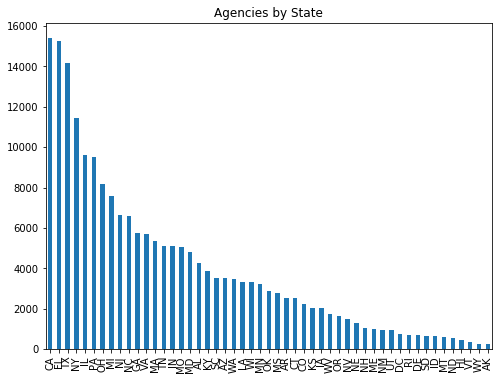

In [112]:
inpatient_data['provider_state'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(8,6), title ='Agencies by State')